# Lenscribe - VGG16 and BLIP Demo

This notebook demonstrates how to use VGG16 and BLIP models for computer vision and vision-language tasks.

In [1]:
# Import required libraries
import sys
import os
sys.path.append('..')

from src.models.vgg16_classifier import VGG16Classifier
from src.models.blip_processor import BLIPProcessor
from src.utils.image_processor import ImageProcessor
import matplotlib.pyplot as plt
from PIL import Image

## Initialize Models

In [3]:
# Initialize VGG16 classifier
vgg16 = VGG16Classifier()
print("VGG16 model loaded successfully!")

# Initialize BLIP processor
blip = BLIPProcessor()
print(f"BLIP model loaded successfully! {blip.get_device_info()}")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


VGG16 model loaded successfully!
BLIP model loaded successfully! Using device: cpu


## Load and Display Image

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\delma\AppData\Local\Temp\ipykernel_7980\2679178081.py:2: SyntaxWarning: invalid escape sequence '\d'
  image_path = "C:\\Users\delma\OneDrive\Pictures\Screenshots 1\Screenshot 2025-08-08 201311.png"


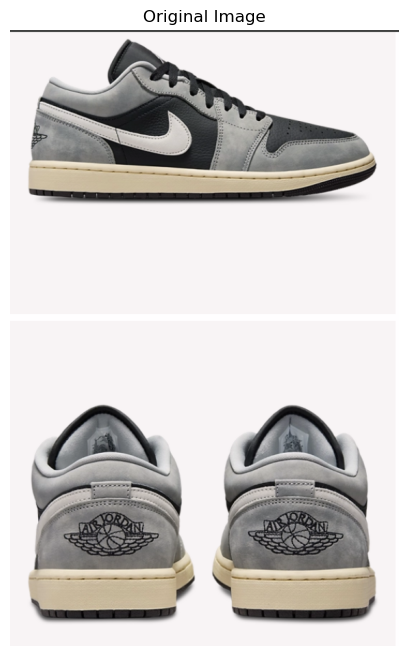

In [5]:
# Load an image (replace with your image path)
image_path = "C:\\Users\delma\OneDrive\Pictures\Screenshots 1\Screenshot 2025-08-08 201311.png"

# Load and display the image
image = ImageProcessor.load_image(image_path)
ImageProcessor.display_image(image, "Original Image")

## VGG16 Image Classification

In [7]:
# Classify the image using VGG16
predictions = vgg16.predict(image_path, top_k=5)

print("VGG16 Predictions:")
for i, (class_id, class_name, confidence) in enumerate(predictions, 1):
    print(f"{i}. {class_name}: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
VGG16 Predictions:
1. sandal: 0.5624
2. iron: 0.1930
3. running_shoe: 0.1017
4. Loafer: 0.0410
5. shoe_shop: 0.0407


## BLIP Image Captioning

In [9]:
# Generate caption using BLIP
caption = blip.generate_caption(image_path)
print(f"Generated Caption: {caption}")

# Generate multiple captions
captions = blip.generate_multiple_captions(image_path, num_captions=3)
print("\nMultiple Captions:")
for i, cap in enumerate(captions, 1):
    print(f"{i}. {cap}")

Generated Caption: the nike air jordans are now available in grey and black

Multiple Captions:
1. a pair of shoes with different color schemes
2. nike air jordan 1 low premium grey
3. nike dun low gs


## BLIP Visual Question Answering

In [11]:
# Ask questions about the image
questions = [
    "What is in this image?",
    "What colors are prominent?",
    "How many objects can you see?"
]

for question in questions:
    answer = blip.answer_question(image_path, question)
    print(f"Q: {question}")
    print(f"A: {answer}\n")

Q: What is in this image?
A: shoes

Q: What colors are prominent?
A: gray

Q: How many objects can you see?
A: 3



## Feature Extraction

In [13]:
# Extract features using VGG16
features = vgg16.extract_features(image_path)
print(f"VGG16 Feature vector shape: {features.shape}")
print(f"Feature vector (first 10 values): {features[:10]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
VGG16 Feature vector shape: (512,)
Feature vector (first 10 values): [ 2.275242    0.          0.8070237   9.673264    4.624141    0.
  0.          0.69165415  0.         44.802185  ]
